In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import pickle

In [2]:
df = sns.load_dataset('penguins')

In [3]:
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<AxesSubplot:xlabel='species', ylabel='count'>

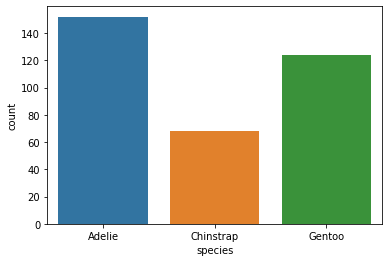

In [6]:
sns.countplot(x='species', data=df)

In [8]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [9]:
df['sex'].replace(np.nan,df['sex'].value_counts().idxmax(),inplace=True)

In [10]:
genderEnc = LabelEncoder()
df['sex'] = genderEnc.fit_transform(df['sex'])

In [11]:
cols_to_impute  = df.columns.tolist()[2:-1]
imputer = SimpleImputer()
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,1
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,1
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,0
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,1
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,0
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,1
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,0


In [12]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [15]:
fig = px.scatter_3d(df,x='bill_length_mm',y='bill_depth_mm',z='flipper_length_mm',color='species')
fig.write_html('species.html', auto_open = True)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
x = df[['bill_length_mm','flipper_length_mm','body_mass_g','sex']]
scaled_x = StandardScaler()
x = scaled_x.fit_transform(x)
y = df['species']

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2)
m1 = KNeighborsClassifier()
m1.fit(xtrain,ytrain)
ypred = m1.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
m2 = LogisticRegression()
m2.fit(xtrain,ytrain)
ypred2 = m2.predict(xtest)
print(confusion_matrix(ytest,ypred2))
print(classification_report(ytest,ypred2))

[[34  2  0]
 [ 0 10  0]
 [ 1  0 22]]
              precision    recall  f1-score   support

      Adelie       0.97      0.94      0.96        36
   Chinstrap       0.83      1.00      0.91        10
      Gentoo       1.00      0.96      0.98        23

    accuracy                           0.96        69
   macro avg       0.93      0.97      0.95        69
weighted avg       0.96      0.96      0.96        69

[[36  0  0]
 [ 0 10  0]
 [ 1  0 22]]
              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        36
   Chinstrap       1.00      1.00      1.00        10
      Gentoo       1.00      0.96      0.98        23

    accuracy                           0.99        69
   macro avg       0.99      0.99      0.99        69
weighted avg       0.99      0.99      0.99        69

